In [ ]:
import os
import time
#mysys="jupyter" #
mysys="colab"

splt="_9505b_"
sn='sn_'
sprat=0.05

if mysys=="colab":
    from google.colab import drive
    drive.mount('/content/drive')
    path='/content/drive/MyDrive/ANN_Edge/unsw_data/final/'
    slash="/"
    ML_path=path+'ml/'
    STDN_path=ML_path+ '/ml/stdn/'
else:
    current_folder = os.getcwd()
    print(current_folder)
    slash="\\"
    path=current_folder.replace('Model_05', "") + 'ANN_Edge\\final\\'
    print(path)
    ML_path=current_folder.replace('Model_05', "") + 'ANN_Edge\\final\ml\\'
    STDN_path=current_folder.replace('Model_05', "") + 'ANN_Edge\\final\ml\stdn\\'


shallow_model_path=path+ 'shallow_model_ANN5.keras'

deep_model_path=path+ 'deep_model_ANN5.keras'

metrics_f=ML_path  + 'mlj1_metrics_hpt5.csv'
metrics_results=ML_path  + 'mlj1_metrics_models.csv'

feat_file=path+"unsw-nb15_f.csv"
f_train=path+'unsw-nb15_training' + splt +'.csv'
f_test=path+'unsw-nb15_testing' + splt+ '.csv'
print(f_train)
print(f_test)
print(shallow_model_path)
print(deep_model_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/ANN_Edge/unsw_data/final/unsw-nb15_training_9505b_.csv
/content/drive/MyDrive/ANN_Edge/unsw_data/final/unsw-nb15_testing_9505b_.csv
/content/drive/MyDrive/ANN_Edge/unsw_data/final/shallow_model_ANN5.keras
/content/drive/MyDrive/ANN_Edge/unsw_data/final/deep_model_ANN5.keras


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load preprocessed data for training and testing
df_train = pd.read_csv(f_train)
df_test = pd.read_csv(f_test)
df_train.info()
# Define the features
features = ['ct_state_ttl', 'sload', 'rate', 'sttl', 'smean', 'dload', 'sbytes', 'ct_srv_dst', 'ct_dst_src_ltm', 'dbytes', 'ackdat', 'dttl', 'ct_dst_sport_ltm', 'dmean','ct_srv_src', 'dinpkt', 'tcprtt', 'dur', 'synack', 'sinpkt']
#features2= ['ct_state_ttl', 'sload', 'rate', 'sttl', 'smean', 'dload', 'sbytes', 'ct_srv_dst', 'ct_dst_src_ltm', 'dbytes', 'ackdat', 'dttl', 'ct_dst_sport_ltm', 'dmean', 'ct_srv_src', 'dinpkt', 'tcprtt', 'dur', 'synack', 'sinpkt'], 'proto', 'dport', 'stime']

#df_train[features].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176700 entries, 0 to 176699
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 176700 non-null  int64  
 1   dur                176700 non-null  float64
 2   proto              176700 non-null  object 
 3   service            176700 non-null  object 
 4   state              176700 non-null  object 
 5   spkts              176700 non-null  int64  
 6   dpkts              176700 non-null  int64  
 7   sbytes             176700 non-null  int64  
 8   dbytes             176700 non-null  int64  
 9   rate               176700 non-null  float64
 10  sttl               176700 non-null  int64  
 11  dttl               176700 non-null  int64  
 12  sload              176700 non-null  float64
 13  dload              176700 non-null  float64
 14  sloss              176700 non-null  int64  
 15  dloss              176700 non-null  int64  
 16  si

256 / 0.5
128 /0.1
0.001

nurals 256, 128, 64, 32, 16, 8, 4  deep
hyper

512, shallow

number of weights  / match number of parameters


Hybrid these two

In [ ]:
df_train[features]

,ct_state_ttl,sload,rate,sttl,smean,dload,sbytes,ct_srv_dst,ct_dst_src_ltm,dbytes,ackdat,dttl,ct_dst_sport_ltm,dmean,ct_srv_src,dinpkt,tcprtt,dur,synack,sinpkt
0,6,7.589008e+02,0.878357,254,108,0.000000e+00,5616,1,1,0,0.000000,0,1,0,1,0.000000,0.000000,58.062927,0.000000,1170.503250
1,0,7.742179e+05,3423.232663,31,57,1.254318e+07,5174,5,2,83812,0.000132,29,1,911,7,0.587820,0.000682,0.052874,0.000550,0.611198
2,2,1.000000e+08,125000.000300,254,100,0.000000e+00,200,6,6,0,0.000000,0,3,0,6,0.000000,0.000000,0.000008,0.000000,0.008000
3,1,7.971275e+03,21.947345,254,76,2.621976e+03,756,3,3,268,0.044882,252,1,45,3,96.065797,0.248004,0.683454,0.203122,72.744667
4,1,8.682808e+03,48.324890,62,76,2.939303e+05,906,1,1,29256,0.110426,252,1,1125,1,25.212800,0.245752,0.765651,0.135326,69.559361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176695,0,6.296818e+05,2709.799366,31,59,8.574561e+06,3806,8,1,51808,0.000143,29,1,785,3,0.746032,0.000739,0.047605,0.000596,0.750603
176696,2,5.066666e+07,111111.107200,254,57,0.000000e+00,114,36,36,0,0.000000,0,4,0,36,0.000000,0.000000,0.000009,0.000000,0.009000
176697,0,5.468165e+05,2808.988808,31,73,6.666667e+05,146,5,3,178,0.000000,29,1,89,4,0.005000,0.000000,0.001068,0.000000,0.010000
176698,1,7.076849e+03,27.817804,254,53,3.323300e+03,530,1,1,268,0.055192,252,1,45,1,74.500000,0.196201,0.539223,0.141009,59.913667


In [ ]:
df_train['label']

0         1
1         0
2         1
3         1
4         1
         ..
176695    0
176696    1
176697    0
176698    1
176699    1
Name: label, Length: 176700, dtype: int64

In [ ]:
# Select features and target variable for training and testing
X_train = df_train[features].values
y_train = df_train['label'].values

X_test = df_test[features].values
y_test = df_test['label'].values

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
import time
import psutil
import numpy as np
import joblib
import pandas as pd
import tensorflow as tf
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

performance_metrics = []
# Define function to measure memory usage
def memory_usage():
    process = psutil.Process()
    return process.memory_info().rss

# Define function to measure CPU usage
def cpu_usage():
    return psutil.cpu_percent()

# Define function to calculate training and testing time
def calculate_time(start_time):
    end_time = time.time()
    elapsed_time = end_time - start_time
    return elapsed_time

# Define function to display performance metrics
def display_metrics(test_loss, test_accuracy, val_accuracy, precision, recall, f1, roc_auc, avg_precision):
    print("Test Loss:", test_loss)
    print("Test Accuracy:", test_accuracy)
    print("Validation Accuracy:", val_accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("ROC-AUC Score:", roc_auc)
    print("Average Precision Score:", avg_precision)

## Shallow *ANN* Model

In [ ]:
# Define Shallow model hyperparameters
shallow_hyperparameters = {
    'input_dim': len(features),
    'neurons_layer1': 512,
    'activation_layer1': 'relu',
    'learning_rate': 0.0001
}

# Define paths and model name
modelpath = shallow_model_path
model_name = 'shallow_model_ANN'



In [ ]:
# Define shallow ANN model function
def create_shallow_ann_model(input_dim, neurons_layer1, activation_layer1, learning_rate):
    model = Sequential()

    # hidden layer 1
    model.add(Dense(neurons_layer1, input_dim=input_dim, activation=activation_layer1))

    # Output layer
    model.add(Dense(1, activation='sigmoid'))

    # Compile model
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    return model


# Create the shallow ANN model with the best hyperparameters
start_time = time.time()
shallow_model = create_shallow_ann_model(**shallow_hyperparameters)
train_time = calculate_time(start_time)

# Train the model on the training data
start_time = time.time()
history = shallow_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)
train_time += calculate_time(start_time)

# Evaluate the model on the test set
start_time = time.time()
test_loss, test_accuracy = shallow_model.evaluate(X_test, y_test)
test_time = calculate_time(start_time)

# Calculate additional performance metrics on the validation set
y_pred_val = shallow_model.predict(X_test)
val_accuracy = accuracy_score(y_test, np.round(y_pred_val))
precision = precision_score(y_test, np.round(y_pred_val))
recall = recall_score(y_test, np.round(y_pred_val))
f1 = f1_score(y_test, np.round(y_pred_val))
roc_auc = roc_auc_score(y_test, y_pred_val)
avg_precision = average_precision_score(y_test, y_pred_val)


# Display performance metrics
display_metrics(test_loss, test_accuracy, val_accuracy, precision, recall, f1, roc_auc, avg_precision)
summary=shallow_model.summary()
print(summary)

# Save the trained model for inference
#joblib.dump(shallow_model, modelpath)
tf.keras.models.save_model(shallow_model, modelpath)
# Collect memory usage, CPU usage, and append to an array
metrics = {
    'Time':time.time(),
    'Model': model_name,
    'Training Time': train_time,
    'Testing Time': test_time,
    'Memory Usage': memory_usage(),
    'CPU Usage': cpu_usage(),
    'Test Loss': test_loss,
    'Test Accuracy': test_accuracy,
    'Validation Accuracy': val_accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1,
    'ROC-AUC Score': roc_auc,
    'Average Precision Score': avg_precision
}


Epoch 1/10
4418/4418 [==============================] - 24s 5ms/step - loss: 0.2657 - accuracy: 0.8742 - val_loss: 0.2206 - val_accuracy: 0.8934
Epoch 2/10
4418/4418 [==============================] - 9s 2ms/step - loss: 0.2100 - accuracy: 0.8962 - val_loss: 0.2043 - val_accuracy: 0.9011
Epoch 3/10
4418/4418 [==============================] - 10s 2ms/step - loss: 0.1974 - accuracy: 0.9027 - val_loss: 0.1945 - val_accuracy: 0.9060
Epoch 4/10
4418/4418 [==============================] - 15s 4ms/step - loss: 0.1897 - accuracy: 0.9076 - val_loss: 0.1890 - val_accuracy: 0.9095
Epoch 5/10
4418/4418 [==============================] - 15s 3ms/step - loss: 0.1845 - accuracy: 0.9112 - val_loss: 0.1844 - val_accuracy: 0.9127
Epoch 6/10
4418/4418 [==============================] - 10s 2ms/step - loss: 0.1804 - accuracy: 0.9142 - val_loss: 0.1839 - val_accuracy: 0.9118
Epoch 7/10
4418/4418 [==============================] - 14s 3ms/step - loss: 0.1772 - accuracy: 0.9164 - val_loss: 0.1782 - val_acc

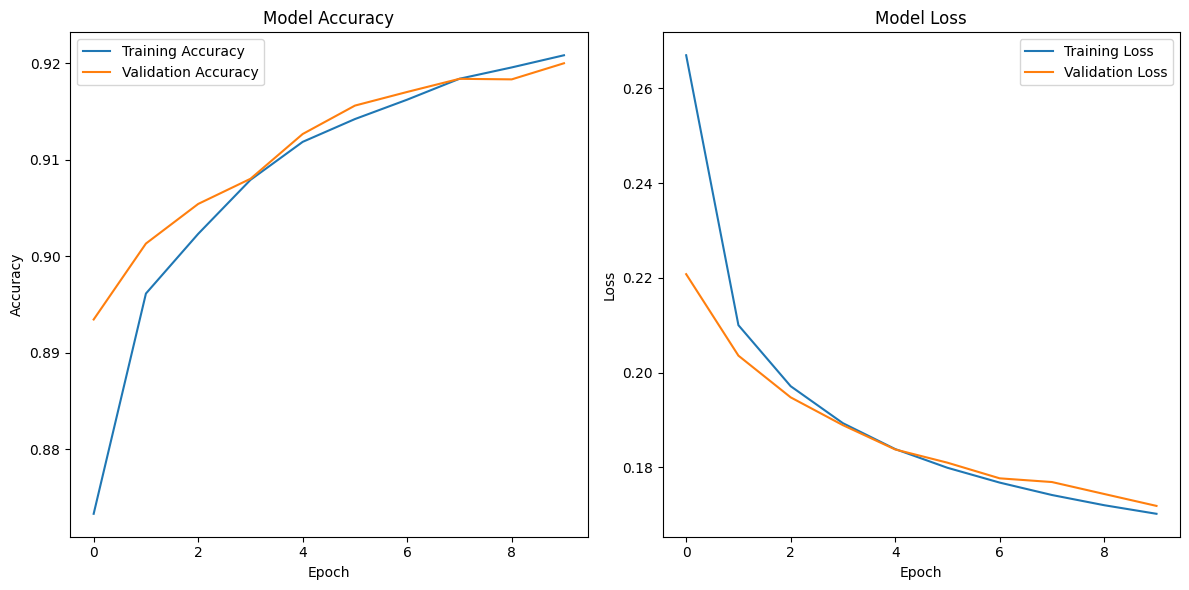

In [ ]:
import matplotli pyplot as plt

# Create a figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot accuracy
axes[0].plot(history.history['accuracy'], label='Training Accuracy')
axes[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
axes[0].set_title('Model Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend()

# Plot loss
axes[1].plot(history.history['loss'], label='Training Loss')
axes[1].plot(history.history['val_loss'], label='Validation Loss')
axes[1].set_title('Model Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()

plt.tight_layout()
plt.show()


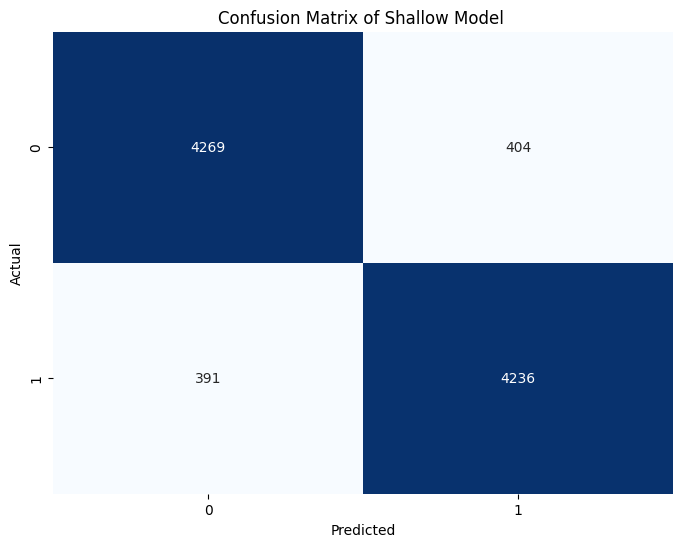

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, np.round(y_pred_val))

# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix of Shallow Model ")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

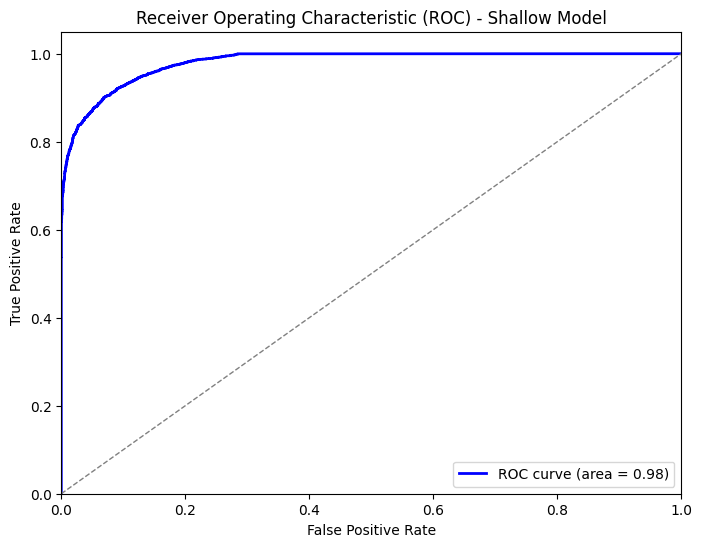

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_val)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Shallow Model')
plt.legend(loc="lower right")
plt.show()

#metrics['ROC'] = roc_auc


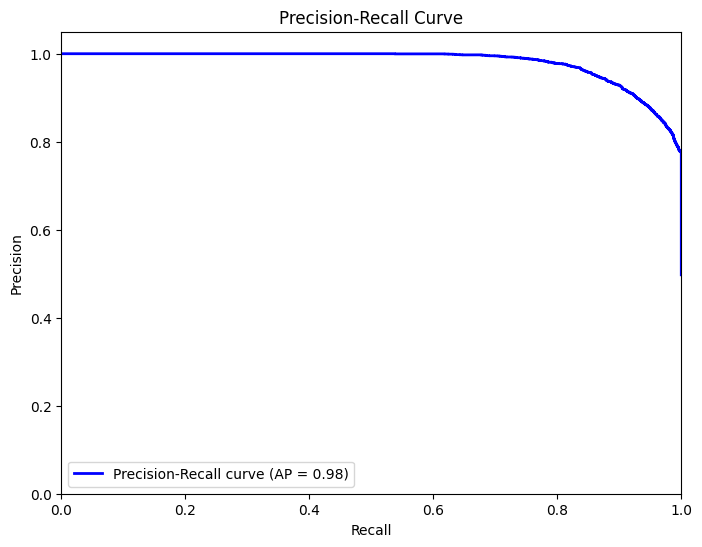

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Calculate Precision-Recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_val)
average_precision = average_precision_score(y_test, y_pred_val)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve (AP = %0.2f)' % average_precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.show()

#metrics['Precision_RS'] = average_precision



In [ ]:
#Append the metrics to an array
performance_metrics.append(metrics)

# Convert performance_metrics array to DataFrame
df_performance_metrics = pd.DataFrame(performance_metrics)

# Display the DataFrame
print(df_performance_metrics)

           Time              Model  Training Time  Testing Time  Memory Usage  \
0  1.708522e+09  shallow_model_ANN     143.990007      0.688516     890953728   

   CPU Usage  Test Loss  Test Accuracy  Validation Accuracy  Precision  \
0       57.9    0.17332       0.914516             0.914516   0.912931   

     Recall  F1 Score  ROC-AUC Score  Average Precision Score  
0  0.915496  0.914212       0.980319                 0.981035  


## Deep Model ANN

In [ ]:
# Define deep model hyperparameters
deep_hyperparameters = {
    'input_dim': len(features),
    'neurons_layer1': 256,
    'activation_layer1': 'relu',
    'neurons_layer2': 128,
    'activation_layer2': 'relu',
    'neurons_layer3': 64,
    'activation_layer3': 'relu',
    'neurons_layer4': 32,
    'activation_layer4': 'relu',
    'neurons_layer5': 16,
    'activation_layer5': 'relu',
    'neurons_layer6': 8,
    'activation_layer6': 'relu',
    'neurons_layer7': 4,
    'activation_layer7': 'relu',
    'learning_rate': 0.0001
}

# Define paths and model name
modelpath = deep_model_path
model_name = 'deep_model_ANN'



In [ ]:
def create_deep_ann_model(input_dim, neurons_layer1, activation_layer1, neurons_layer2, activation_layer2, neurons_layer3, activation_layer3,
                          neurons_layer4, activation_layer4, neurons_layer5, activation_layer5, neurons_layer6, activation_layer6,
                          neurons_layer7, activation_layer7, learning_rate):
    model = Sequential()

    # Hidden layer 1
    model.add(Dense(neurons_layer1, input_dim=input_dim, activation=activation_layer1))

    # Hidden layer 2
    model.add(Dense(neurons_layer2, activation=activation_layer2))

    # Hidden layer 3
    model.add(Dense(neurons_layer3, activation=activation_layer3))

    # Hidden layer 4
    model.add(Dense(neurons_layer4, activation=activation_layer4))

    # Hidden layer 5
    model.add(Dense(neurons_layer5, activation=activation_layer5))

    # Hidden layer 6
    model.add(Dense(neurons_layer6, activation=activation_layer6))

    # Hidden layer 7
    model.add(Dense(neurons_layer7, activation=activation_layer7))

    # Output layer
    model.add(Dense(1, activation='sigmoid'))

    # Compile model
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    return model

# Create the deep ANN model with the best hyperparameters
start_time = time.time()
deep_model = create_deep_ann_model(**deep_hyperparameters)
train_time = calculate_time(start_time)

# Train the model on the training data
start_time = time.time()
history = deep_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)
train_time += calculate_time(start_time)

# Evaluate the model on the test set
start_time = time.time()
test_loss, test_accuracy = deep_model.evaluate(X_test, y_test)
test_time = calculate_time(start_time)

# Calculate additional performance metrics on the validation set
y_pred_val = deep_model.predict(X_test)
val_accuracy = accuracy_score(y_test, np.round(y_pred_val))
precision = precision_score(y_test, np.round(y_pred_val))
recall = recall_score(y_test, np.round(y_pred_val))
f1 = f1_score(y_test, np.round(y_pred_val))
roc_auc = roc_auc_score(y_test, y_pred_val)
avg_precision = average_precision_score(y_test, y_pred_val)


# Display performance metrics
display_metrics(test_loss, test_accuracy, val_accuracy, precision, recall, f1, roc_auc, avg_precision)

summary=deep_model.summary()
print(summary)

# Save the trained model for inference
#tf.keras.models.save_model(deep_model, modelpath)


# Collect memory usage, CPU usage, and append to an array
metrics = {
    'Time':time.time(),
    'Model': model_name,
    'Training Time': train_time,
    'Testing Time': test_time,
    'Memory Usage': memory_usage(),
    'CPU Usage': cpu_usage(),
    'Test Loss': test_loss,
    'Test Accuracy': test_accuracy,
    'Validation Accuracy': val_accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1,
    'ROC-AUC Score': roc_auc,
    'Average Precision Score': avg_precision
}


Epoch 1/10
4418/4418 [==============================] - 25s 4ms/step - loss: 0.2486 - accuracy: 0.8828 - val_loss: 0.1928 - val_accuracy: 0.9062
Epoch 2/10
4418/4418 [==============================] - 18s 4ms/step - loss: 0.1829 - accuracy: 0.9102 - val_loss: 0.1775 - val_accuracy: 0.9169
Epoch 3/10
4418/4418 [==============================] - 23s 5ms/step - loss: 0.1736 - accuracy: 0.9172 - val_loss: 0.1710 - val_accuracy: 0.9186
Epoch 4/10
4418/4418 [==============================] - 19s 4ms/step - loss: 0.1677 - accuracy: 0.9206 - val_loss: 0.1684 - val_accuracy: 0.9190
Epoch 5/10
4418/4418 [==============================] - 27s 6ms/step - loss: 0.1631 - accuracy: 0.9231 - val_loss: 0.1643 - val_accuracy: 0.9236
Epoch 6/10
4418/4418 [==============================] - 16s 4ms/step - loss: 0.1597 - accuracy: 0.9254 - val_loss: 0.1578 - val_accuracy: 0.9269
Epoch 7/10
4418/4418 [==============================] - 16s 4ms/step - loss: 0.1572 - accuracy: 0.9258 - val_loss: 0.1622 - val_ac

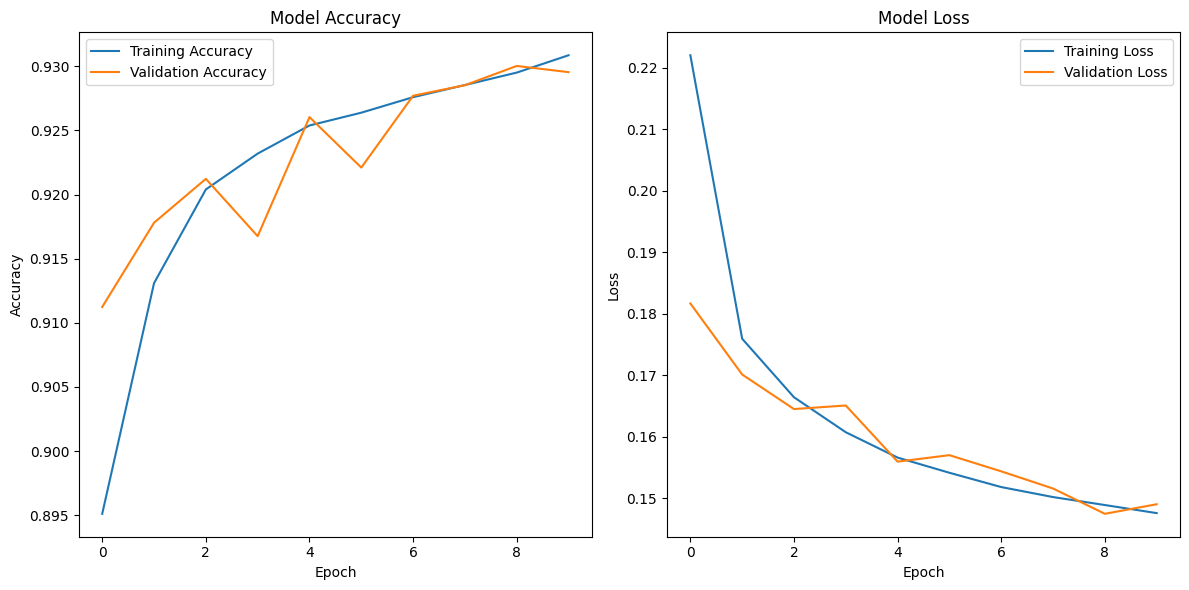

In [ ]:
import matplotlib.pyplot as plt

# Create a figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot accuracy
axes[0].plot(history.history['accuracy'], label='Training Accuracy')
axes[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
axes[0].set_title('Model Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend()

# Plot loss
axes[1].plot(history.history['loss'], label='Training Loss')
axes[1].plot(history.history['val_loss'], label='Validation Loss')
axes[1].set_title('Model Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()

plt.tight_layout()
plt.show()


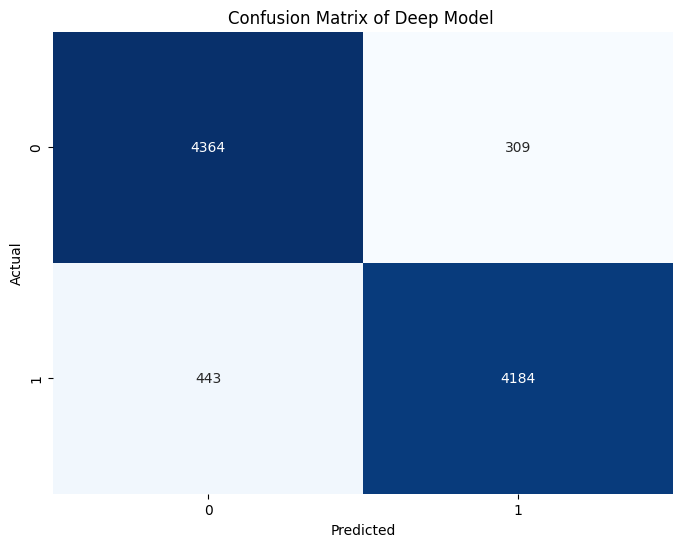

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, np.round(y_pred_val))

# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix of Deep Model ")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

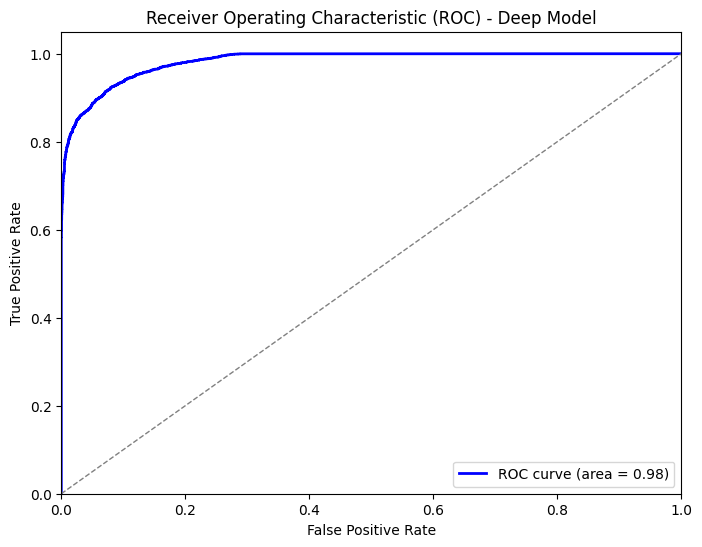

In [ ]:

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_val)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Deep Model')
plt.legend(loc="lower right")
plt.show()

#metrics['ROC'] = roc_auc


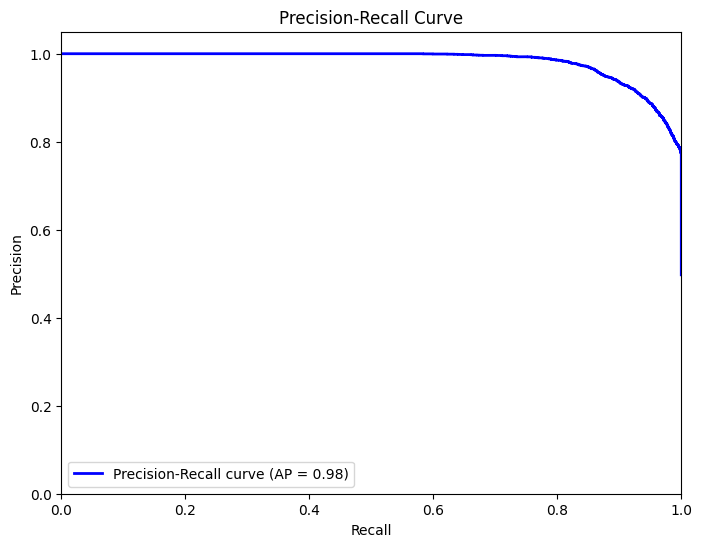

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Calculate Precision-Recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_val)
average_precision = average_precision_score(y_test, y_pred_val)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve (AP = %0.2f)' % average_precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.show()

#metrics['Precision_RS'] = average_precision


In [ ]:
#Append the metrics to an array
performance_metrics.append(metrics)

# Convert performance_metrics array to DataFrame
df_performance_metrics = pd.DataFrame(performance_metrics)

# Display the DataFrame
print(df_performance_metrics)

           Time              Model  Training Time  Testing Time  Memory Usage  \
0  1.708522e+09  shallow_model_ANN     143.990007      0.688516     890953728   
1  1.708523e+09    deep_model_ANN2     144.231188      0.686874     971530240   

   CPU Usage  Test Loss  Test Accuracy  Validation Accuracy  Precision  \
0       57.9   0.173320       0.914516             0.914516   0.912931   
1       74.5   0.153484       0.923333             0.923333   0.929732   

     Recall  F1 Score  ROC-AUC Score  Average Precision Score  
0  0.915496  0.914212       0.980319                 0.981035  
1  0.915064  0.922340       0.984646                 0.985401  


## Hyperparameter Tuning

In [ ]:
!pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 3.2 MB/s eta 0:00:00


In [ ]:
from kerastuner.tuners import RandomSearch, Hyperband


<ipython-input-27-e64760501d7e>:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch, Hyperband


## Hyperparameter tuning - shallow model

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.regularizers import l1, l2  # Import l1 and l2 functions

from kerastuner import RandomSearch
from kerastuner import HyperParameters

modelname="shallow_model"
hpt_method="random search"
hp_array=[]

# Define a learning rate scheduler function
def lr_scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

def build_shallow_ann_model(hp):
    model = Sequential()

    # Input layer
    model.add(Dense(units=512,
                    input_dim=len(features),
                    activation=hp['activation_layer1'],
                    kernel_initializer=hp['weight_initializer'],
                    kernel_regularizer=l1(hp['regularization_strength']) if hp['regularization_type'] == 'l1' else
                                     l2(hp['regularization_strength']) if hp['regularization_type'] == 'l2' else None))

    # Dropout layer (optional)
    if hp['use_dropout']:
        model.add(Dropout(rate=hp['dropout_rate']))

    # Output layer
    model.add(Dense(1, activation='sigmoid'))

    # Define the learning rate scheduler
    lr_schedule = LearningRateScheduler(lr_scheduler)

    # Choose the optimizer based on the hyperparameter value
    optimizer = None
    if hp['optimizer'] == 'adam':
        optimizer = tf.keras.optimizers.Adam(learning_rate=hp['learning_rate'])
    elif hp['optimizer'] == 'rmsprop':
        optimizer = tf.keras.optimizers.RMSprop(learning_rate=hp['learning_rate'])
    elif hp['optimizer'] == 'sgd':
        optimizer = tf.keras.optimizers.SGD(learning_rate=hp['learning_rate'], momentum=0.9)

    model.compile(optimizer=optimizer,
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model



# Create a HyperParameters object
hp = HyperParameters()

# Add hyperparameters to the object
hp.Choice('activation_layer1', ['relu', 'tanh', 'leaky_relu'])
hp.Choice('optimizer', ['adam', 'rmsprop', 'sgd'])  # Hyperparameter for choosing the optimizer
hp.Choice('learning_rate', [0.01, 0.001, 0.0001])
hp.Choice('weight_initializer', ['random_normal', 'glorot_uniform', 'he_normal'])
hp.Choice('batch_size', [8, 16, 32, 64, 128, 256])
hp.Choice('regularization_type', ['','l1', 'l2'])
hp.Choice('regularization_strength', [0.0, 0.001, 0.01, 0.1])
hp.Choice('use_lr_scheduler', [True, False])  # Hyperparameter for choosing whether to use the learning rate scheduler
hp.Choice('use_dropout', [True, False])  # Hyperparameter for choosing whether to use dropout
hp.Float('dropout_rate', 0.0, 0.5, step=0.1)  # Dropout rate hyperparameter


0.0

In [ ]:
# Instantiate the RandomSearch tuner with the HyperParameters object
tuner = RandomSearch(
    build_shallow_ann_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=1,
    directory='my_dir',
    project_name='shallow_ann_hyperparameter_tuning_RS',
    hyperparameters=hp  # Use the HyperParameters object
)

# Record start time
start_time = time.time()

# Perform hyperparameter tuning
tuner.search(X_train, y_train,
             epochs=10,
             validation_split=0.2)

# Record end time
end_time = time.time()
elapsed_time = end_time - start_time

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Build the model with the best hyperparameters and train it
best_model = tuner.hypermodel.build(best_hps)
history = best_model.fit(X_train, y_train, epochs=10, validation_split=0.2)

# Record additional metrics
memory_usage = psutil.virtual_memory().used
cpu_usage = psutil.cpu_percent()

# Evaluate the best model on the test set
print("Best Hyperparameters:")
print(best_hps.values)


# Evaluate the best model on the test set
test_metrics = best_model.evaluate(X_test, y_test)

# Additional classification metrics
y_pred = best_model.predict(X_test)
y_pred_classes = np.round(y_pred)

precision = precision_score(y_test, np.round(y_pred))
recall = recall_score(y_test, np.round(y_pred))
f1 = f1_score(y_test, np.round(y_pred))
roc_auc = roc_auc_score(y_test, y_pred)
avg_precision = average_precision_score(y_test, y_pred)

confusion_matrix = tf.math.confusion_matrix(y_test, y_pred_classes).numpy()

# Additional regression metrics
regression_metrics = {
    'mse': test_metrics[0],  # Mean Squared Error
    'mae': test_metrics[1],  # Mean Absolute Error
    'r_squared': 1 - (np.sum((y_test - y_pred.flatten())**2) / np.sum((y_test - np.mean(y_test))**2)),
    'explained_variance': 1 - (np.var(y_test - y_pred.flatten()) / np.var(y_test))
}

# Display metrics
print("Test Metrics:")
print(" - Loss:", test_metrics[0])
print(" - Accuracy:", test_metrics[1])
print(" - Other Metrics:")
print("   - Precision:", precision)
print("   - Recall:", recall)
print("   - F1 Score:", f1)
print("   - ROC-AUC:", roc_auc)
print("   - Precision Score", avg_precision)
print("   - Confusion Matrix:")
print(confusion_matrix)

print("Regression Metrics:")
for metric_name, metric_value in regression_metrics.items():
    print(f" - {metric_name}: {metric_value}")

# Save experiment details in hp_array
experiment_details = {
    'model': modelname,
    'hpt_method':hpt_method,
    'best_hyperparameters': best_hps.values,
    'elapsed_time': elapsed_time,
    'memory_usage': memory_usage,
    'cpu_usage': cpu_usage,
    'precision': precision,
    'recall': recall,
    'f1_score': f1,
    'roc_auc': roc_auc,
    'confusion_matrix': confusion_matrix.tolist(),
    'regression_metrics': regression_metrics
}
print(experiment_details)
hp_array.append(experiment_details)


Trial 10 Complete [00h 02m 25s]
val_accuracy: 0.9247877597808838

Best val_accuracy So Far: 0.9247877597808838
Total elapsed time: 00h 23m 16s
Epoch 1/10
4418/4418 [==============================] - 25s 5ms/step - loss: 0.2505 - accuracy: 0.8826 - val_loss: 0.2594 - val_accuracy: 0.8830
Epoch 2/10
4418/4418 [==============================] - 12s 3ms/step - loss: 0.2269 - accuracy: 0.8975 - val_loss: 0.2048 - val_accuracy: 0.9120
Epoch 3/10
4418/4418 [==============================] - 13s 3ms/step - loss: 0.2198 - accuracy: 0.9018 - val_loss: 0.1804 - val_accuracy: 0.9150
Epoch 4/10
4418/4418 [==============================] - 14s 3ms/step - loss: 0.2166 - accuracy: 0.9037 - val_loss: 0.2063 - val_accuracy: 0.9102
Epoch 5/10
4418/4418 [==============================] - 13s 3ms/step - loss: 0.2133 - accuracy: 0.9060 - val_loss: 0.1926 - val_accuracy: 0.9115
Epoch 6/10
4418/4418 [==============================] - 13s 3ms/step - loss: 0.2127 - accuracy: 0.9070 - val_loss: 0.1822 - val_accu

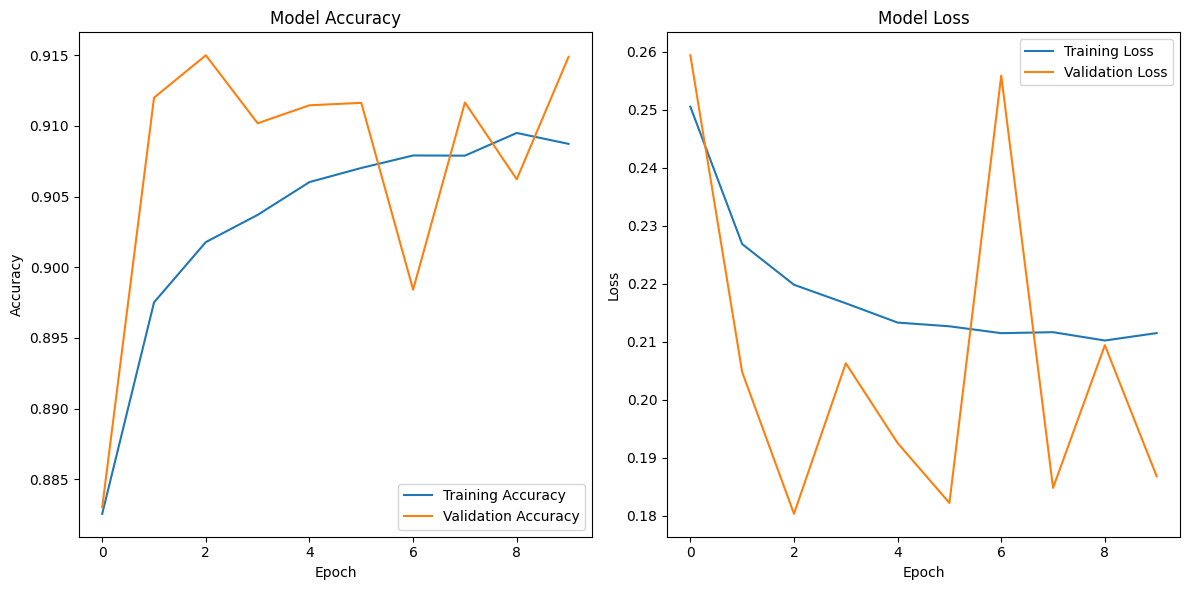

In [ ]:
import matplotlib.pyplot as plt

# Create a figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot accuracy
axes[0].plot(history.history['accuracy'], label='Training Accuracy')
axes[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
axes[0].set_title('Model Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend()

# Plot loss
axes[1].plot(history.history['loss'], label='Training Loss')
axes[1].plot(history.history['val_loss'], label='Validation Loss')
axes[1].set_title('Model Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()

plt.tight_layout()
plt.show()


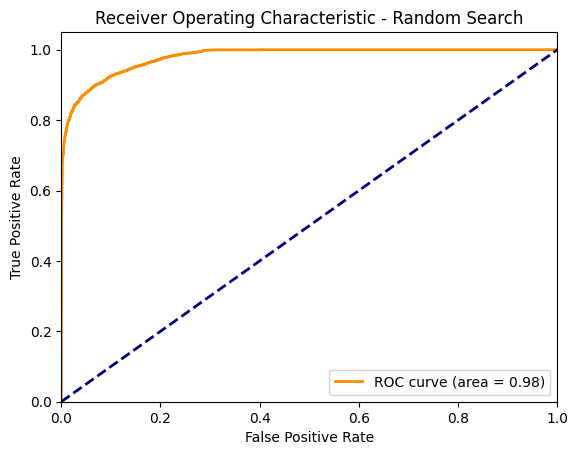

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt

# Calculate AUC-ROC
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot AUC-ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Random Search')
plt.legend(loc='lower right')
plt.show()

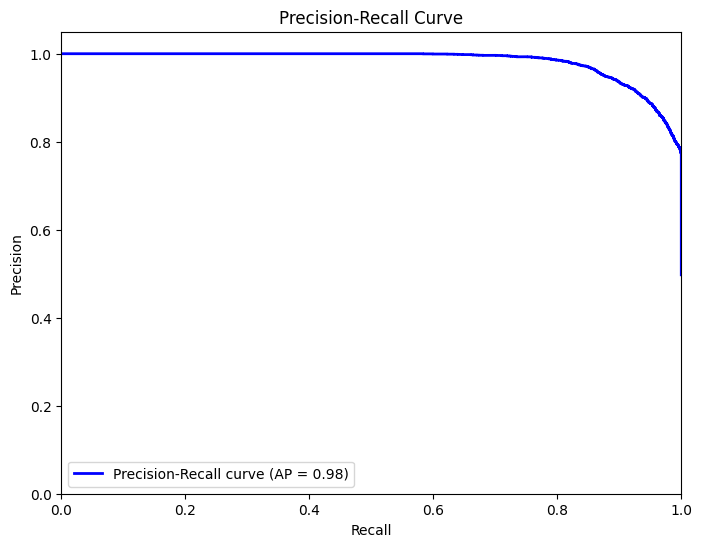

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Calculate Precision-Recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_val)
average_precision = average_precision_score(y_test, y_pred_val)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve (AP = %0.2f)' % average_precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.show()

#metrics['Precision_RS'] = average_precision




## Trial 2 with 25 epochs

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping
from tensorflow.keras.regularizers import l1, l2
from kerastuner import RandomSearch
from kerastuner import HyperParameters

modelname="shallow_model"
hpt_method="random search25"

# Define a learning rate scheduler function
def lr_scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

def build_shallow_ann_model(hp):
    model = Sequential()

    # Input layer
    model.add(Dense(units=512,
                    input_dim=len(features),
                    activation=hp['activation_layer1'],
                    kernel_initializer=hp['weight_initializer'],
                    kernel_regularizer=l1(hp['regularization_strength']) if hp['regularization_type'] == 'l1' else
                                     l2(hp['regularization_strength']) if hp['regularization_type'] == 'l2' else None))

    # Dropout layer (optional)
    if hp['use_dropout']:
        model.add(Dropout(rate=hp['dropout_rate']))

    # Output layer
    model.add(Dense(1, activation='sigmoid'))

    # Define the learning rate scheduler
    lr_schedule = LearningRateScheduler(lr_scheduler)

    # Define early stopping callback
    early_stopping = EarlyStopping(monitor='val_loss', patience=5)  # Adjust patience as needed

    # Choose the optimizer based on the hyperparameter value
    optimizer = None
    if hp['optimizer'] == 'adam':
        optimizer = tf.keras.optimizers.Adam(learning_rate=hp['learning_rate'])
    elif hp['optimizer'] == 'rmsprop':
        optimizer = tf.keras.optimizers.RMSprop(learning_rate=hp['learning_rate'])
    elif hp['optimizer'] == 'sgd':
        optimizer = tf.keras.optimizers.SGD(learning_rate=hp['learning_rate'], momentum=0.9)

    model.compile(optimizer=optimizer,
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model

# Create a HyperParameters object
hp = HyperParameters()

# Add hyperparameters to the object
hp.Choice('activation_layer1', ['relu', 'tanh', 'leaky_relu'])
hp.Choice('optimizer', ['adam', 'rmsprop', 'sgd'])
hp.Choice('learning_rate', [0.01, 0.001, 0.0001])
hp.Choice('weight_initializer', ['random_normal', 'glorot_uniform', 'he_normal'])
hp.Choice('batch_size', [8, 16, 32, 64, 128, 256])
hp.Choice('regularization_type', ['','l1', 'l2'])
hp.Choice('regularization_strength', [0.0, 0.001, 0.01, 0.1])
hp.Choice('use_lr_scheduler', [True, False])
hp.Choice('use_dropout', [True, False])
hp.Float('dropout_rate', 0.0, 0.5, step=0.1)

# Perform random search
tuner = RandomSearch(
    build_shallow_ann_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=1,
    hyperparameters=hp,
    directory='my_dir',
    project_name='shallow_ann')

# Define an early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

# Perform random search with early stopping
tuner.search(X_train, y_train, epochs=25, validation_data=(X_test, y_test), callbacks=[early_stopping])
# Perform hyperparameter tuning
#tuner.search(X_train, y_train, epochs=10,validation_split=0.2)

# Record end time
end_time = time.time()
elapsed_time = end_time - start_time

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Build the model with the best hyperparameters and train it
best_model = tuner.hypermodel.build(best_hps)
history = best_model.fit(X_train, y_train, epochs=25, validation_split=0.2)

# Record additional metrics
memory_usage = psutil.virtual_memory().used
cpu_usage = psutil.cpu_percent()

# Evaluate the best model on the test set
print("Best Hyperparameters:")
print(best_hps.values)


# Evaluate the best model on the test set
test_metrics = best_model.evaluate(X_test, y_test)

# Additional classification metrics
y_pred = best_model.predict(X_test)
y_pred_classes = np.round(y_pred)

precision = precision_score(y_test, np.round(y_pred))
recall = recall_score(y_test, np.round(y_pred))
f1 = f1_score(y_test, np.round(y_pred))
roc_auc = roc_auc_score(y_test, y_pred)
avg_precision = average_precision_score(y_test, y_pred)

confusion_matrix = tf.math.confusion_matrix(y_test, y_pred_classes).numpy()

# Additional regression metrics
regression_metrics = {
    'mse': test_metrics[0],  # Mean Squared Error
    'mae': test_metrics[1],  # Mean Absolute Error
    'r_squared': 1 - (np.sum((y_test - y_pred.flatten())**2) / np.sum((y_test - np.mean(y_test))**2)),
    'explained_variance': 1 - (np.var(y_test - y_pred.flatten()) / np.var(y_test))
}

# Display metrics
print("Test Metrics:")
print(" - Loss:", test_metrics[0])
print(" - Accuracy:", test_metrics[1])
print(" - Other Metrics:")
print("   - Precision:", precision)
print("   - Recall:", recall)
print("   - F1 Score:", f1)
print("   - ROC-AUC:", roc_auc)
print("   - Precision Score", avg_precision)
print("   - Confusion Matrix:")
print(confusion_matrix)

print("Regression Metrics:")
for metric_name, metric_value in regression_metrics.items():
    print(f" - {metric_name}: {metric_value}")

# Save experiment details in hp_array
experiment_details = {
    'model': modelname,
    'hpt_method':hpt_method,
    'best_hyperparameters': best_hps.values,
    'elapsed_time': elapsed_time,
    'memory_usage': memory_usage,
    'cpu_usage': cpu_usage,
    'precision': precision,
    'recall': recall,
    'f1_score': f1,
    'roc_auc': roc_auc,
    'confusion_matrix': confusion_matrix.tolist(),
    'regression_metrics': regression_metrics
}
print(experiment_details)
hp_array.append(experiment_details)


Trial 5 Complete [00h 03m 07s]
val_accuracy: 0.9256989359855652

Best val_accuracy So Far: 0.9256989359855652
Total elapsed time: 00h 17m 58s
Epoch 1/25
4418/4418 [==============================] - 13s 3ms/step - loss: 0.2078 - accuracy: 0.8993 - val_loss: 0.1894 - val_accuracy: 0.9140
Epoch 2/25
4418/4418 [==============================] - 12s 3ms/step - loss: 0.1833 - accuracy: 0.9142 - val_loss: 0.1905 - val_accuracy: 0.9128
Epoch 3/25
4418/4418 [==============================] - 12s 3ms/step - loss: 0.1775 - accuracy: 0.9191 - val_loss: 0.1788 - val_accuracy: 0.9191
Epoch 4/25
4418/4418 [==============================] - 13s 3ms/step - loss: 0.1744 - accuracy: 0.9210 - val_loss: 0.1755 - val_accuracy: 0.9210
Epoch 5/25
4418/4418 [==============================] - 13s 3ms/step - loss: 0.1727 - accuracy: 0.9225 - val_loss: 0.1764 - val_accuracy: 0.9205
Epoch 6/25
4418/4418 [==============================] - 12s 3ms/step - loss: 0.1716 - accuracy: 0.9239 - val_loss: 0.1691 - val_accur

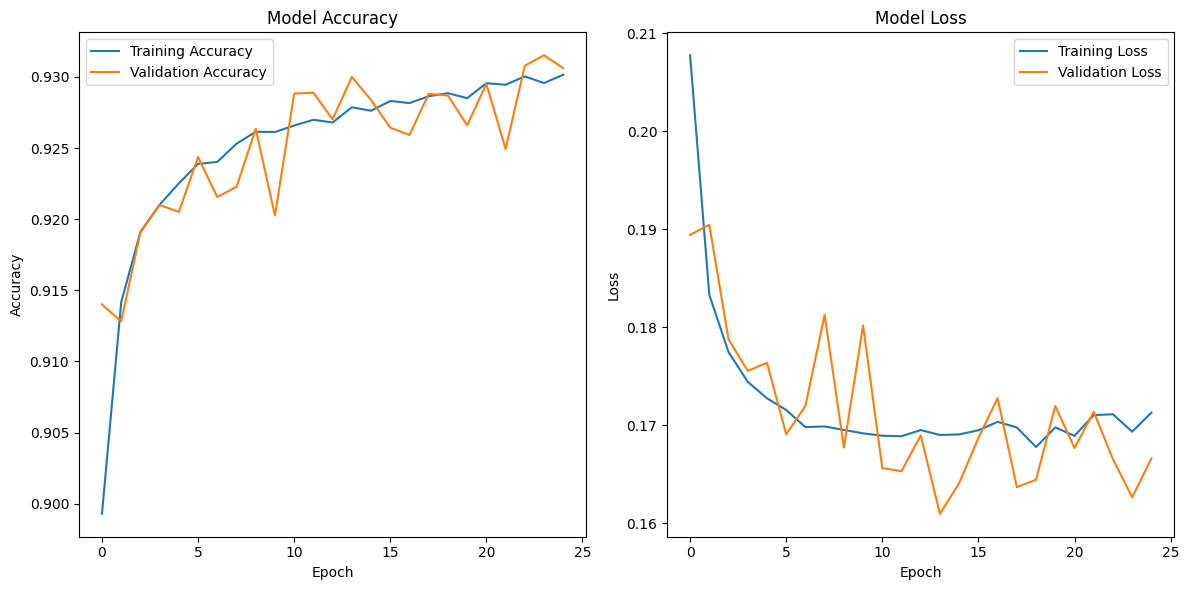

In [ ]:
import matplotlib.pyplot as plt

# Create a figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot accuracy
axes[0].plot(history.history['accuracy'], label='Training Accuracy')
axes[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
axes[0].set_title('Model Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend()

# Plot loss
axes[1].plot(history.history['loss'], label='Training Loss')
axes[1].plot(history.history['val_loss'], label='Validation Loss')
axes[1].set_title('Model Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()

plt.tight_layout()
plt.show()


## Deep model Hyperparameter tuning

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.regularizers import l1, l2  # Import l1 and l2 functions
from kerastuner import RandomSearch
from kerastuner import HyperParameters
import numpy as np
import time
import psutil
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, average_precision_score

modelname = "deep_ann_model"
hpt_method = "random search"

# Define a learning rate scheduler function
def lr_scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

# Update the model building function to include the new hyperparameters and configurations
def build_deep_ann_model(hp):
    model = Sequential()
    lu = hp['units']  # layer units
    # Input layer
    model.add(Dense(units=lu,
                    input_dim=len(features),
                    activation=hp['activation_layer1'],
                    kernel_initializer=hp['weight_initializer'],
                    kernel_regularizer=l1(hp['regularization_strength']) if hp['regularization_type'] == 'l1' else
                    l2(hp['regularization_strength']) if hp['regularization_type'] == 'l2' else None))

    # Hidden layers
    for i in range(1, 7):
        lu = lu / 2
        model.add(Dense(units=lu,
                        activation=hp[f'activation_layer{i + 1}'],
                        kernel_initializer=hp['weight_initializer'],
                        kernel_regularizer=l1(hp['regularization_strength']) if hp['regularization_type'] == 'l1' else
                        l2(hp['regularization_strength']) if hp['regularization_type'] == 'l2' else None))

        # Dropout layer (optional)
        if hp['use_dropout']:
            model.add(Dropout(rate=hp['dropout_rate']))

    # Output layer
    model.add(Dense(1, activation='sigmoid'))

    # Define the learning rate scheduler
    lr_schedule = LearningRateScheduler(lr_scheduler)

    # Choose the optimizer based on the hyperparameter value
    optimizer = None
    if hp['optimizer'] == 'adam':
        optimizer = tf.keras.optimizers.Adam(learning_rate=hp['learning_rate'])
    elif hp['optimizer'] == 'rmsprop':
        optimizer = tf.keras.optimizers.RMSprop(learning_rate=hp['learning_rate'])
    elif hp['optimizer'] == 'sgd':
        optimizer = tf.keras.optimizers.SGD(learning_rate=hp['learning_rate'], momentum=0.9)

    model.compile(optimizer=optimizer,
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model

# Create a HyperParameters object
hp = HyperParameters()
hp.Choice('units', [256])
# Add hyperparameters to the object
hp.Choice('activation_layer1', ['relu', 'tanh', 'leaky_relu'])
hp.Choice('activation_layer2', ['relu', 'tanh', 'leaky_relu'])
hp.Choice('activation_layer3', ['relu', 'tanh', 'leaky_relu'])
hp.Choice('activation_layer4', ['relu', 'tanh', 'leaky_relu'])
hp.Choice('activation_layer5', ['relu', 'tanh', 'leaky_relu'])
hp.Choice('activation_layer6', ['relu', 'tanh', 'leaky_relu'])
hp.Choice('activation_layer7', ['relu', 'tanh', 'leaky_relu'])
hp.Choice('optimizer', ['adam', 'rmsprop', 'sgd'])  # Hyperparameter for choosing the optimizer
hp.Choice('learning_rate', [0.01, 0.001, 0.0001])
hp.Choice('weight_initializer', ['random_normal', 'glorot_uniform', 'he_normal'])
hp.Choice('batch_size', [8, 16, 32, 64, 128, 256])
hp.Choice('regularization_type', ['','l1', 'l2'])
hp.Choice('regularization_strength', [0.0, 0.001, 0.01, 0.1])
hp.Choice('use_lr_scheduler', [True, False])  # Hyperparameter for choosing whether to use the learning rate scheduler
hp.Choice('use_dropout', [True, False])  # Hyperparameter for choosing whether to use dropout
hp.Float('dropout_rate', 0.0, 0.5, step=0.1)  # Dropout rate hyperparameter

0.0

In [ ]:
# Instantiate the RandomSearch tuner with the HyperParameters object
tuner = RandomSearch(
    build_deep_ann_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=1,
    directory='my_dir',
    project_name='deep_ann_hyper_tuning_RS',
    hyperparameters=hp  # Use the HyperParameters object
)

# Record start time
start_time = time.time()

# Perform hyperparameter tuning
tuner.search(X_train, y_train,
             epochs=10,
             validation_split=0.2)

# Record end time
end_time = time.time()
elapsed_time = end_time - start_time

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Build the model with the best hyperparameters and train it
best_model = tuner.hypermodel.build(best_hps)
history = best_model.fit(X_train, y_train, epochs=10, validation_split=0.2)

# Record additional metrics
memory_usage = psutil.virtual_memory().used
cpu_usage = psutil.cpu_percent()

# Evaluate the best model on the test set
print("Best Hyperparameters:")
print(best_hps.values)


# Evaluate the best model on the test set
test_metrics = best_model.evaluate(X_test, y_test)

# Additional classification metrics
y_pred = best_model.predict(X_test)
y_pred_classes = np.round(y_pred)

precision = precision_score(y_test, np.round(y_pred))
recall = recall_score(y_test, np.round(y_pred))
f1 = f1_score(y_test, np.round(y_pred))
roc_auc = roc_auc_score(y_test, y_pred)
avg_precision = average_precision_score(y_test, y_pred)

confusion_matrix = tf.math.confusion_matrix(y_test, y_pred_classes).numpy()

# Additional regression metrics
regression_metrics = {
    'mse': test_metrics[0],  # Mean Squared Error
    'mae': test_metrics[1],  # Mean Absolute Error
    'r_squared': 1 - (np.sum((y_test - y_pred.flatten())**2) / np.sum((y_test - np.mean(y_test))**2)),
    'explained_variance': 1 - (np.var(y_test - y_pred.flatten()) / np.var(y_test))
}

# Display metrics
print("Test Metrics:")
print(" - Loss:", test_metrics[0])
print(" - Accuracy:", test_metrics[1])
print(" - Other Metrics:")
print("   - Precision:", precision)
print("   - Recall:", recall)
print("   - F1 Score:", f1)
print("   - ROC-AUC:", roc_auc)
print("   - Precision Score", avg_precision)
print("   - Confusion Matrix:")
print(confusion_matrix)

print("Regression Metrics:")
for metric_name, metric_value in regression_metrics.items():
    print(f" - {metric_name}: {metric_value}")

# Save experiment details in hp_array
experiment_details = {
    'model': modelname,
    'hpt_method':hpt_method,
    'best_hyperparameters': best_hps.values,
    'elapsed_time': elapsed_time,
    'memory_usage': memory_usage,
    'cpu_usage': cpu_usage,
    'precision': precision,
    'recall': recall,
    'f1_score': f1,
    'roc_auc': roc_auc,
    'confusion_matrix': confusion_matrix.tolist(),
    'regression_metrics': regression_metrics
}
print(experiment_details)
hp_array.append(experiment_details)


Trial 10 Complete [00h 03m 24s]
val_accuracy: 0.9295982122421265

Best val_accuracy So Far: 0.9297962784767151
Total elapsed time: 00h 35m 47s
Epoch 1/10
4418/4418 [==============================] - 20s 4ms/step - loss: 0.4503 - accuracy: 0.8514 - val_loss: 0.3698 - val_accuracy: 0.8995
Epoch 2/10
4418/4418 [==============================] - 19s 4ms/step - loss: 0.3557 - accuracy: 0.8982 - val_loss: 0.3053 - val_accuracy: 0.9164
Epoch 3/10
4418/4418 [==============================] - 17s 4ms/step - loss: 0.3040 - accuracy: 0.9060 - val_loss: 0.2651 - val_accuracy: 0.9174
Epoch 4/10
4418/4418 [==============================] - 16s 4ms/step - loss: 0.2697 - accuracy: 0.9100 - val_loss: 0.2367 - val_accuracy: 0.9223
Epoch 5/10
4418/4418 [==============================] - 18s 4ms/step - loss: 0.2461 - accuracy: 0.9117 - val_loss: 0.2182 - val_accuracy: 0.9202
Epoch 6/10
4418/4418 [==============================] - 17s 4ms/step - loss: 0.2297 - accuracy: 0.9137 - val_loss: 0.2038 - val_accu

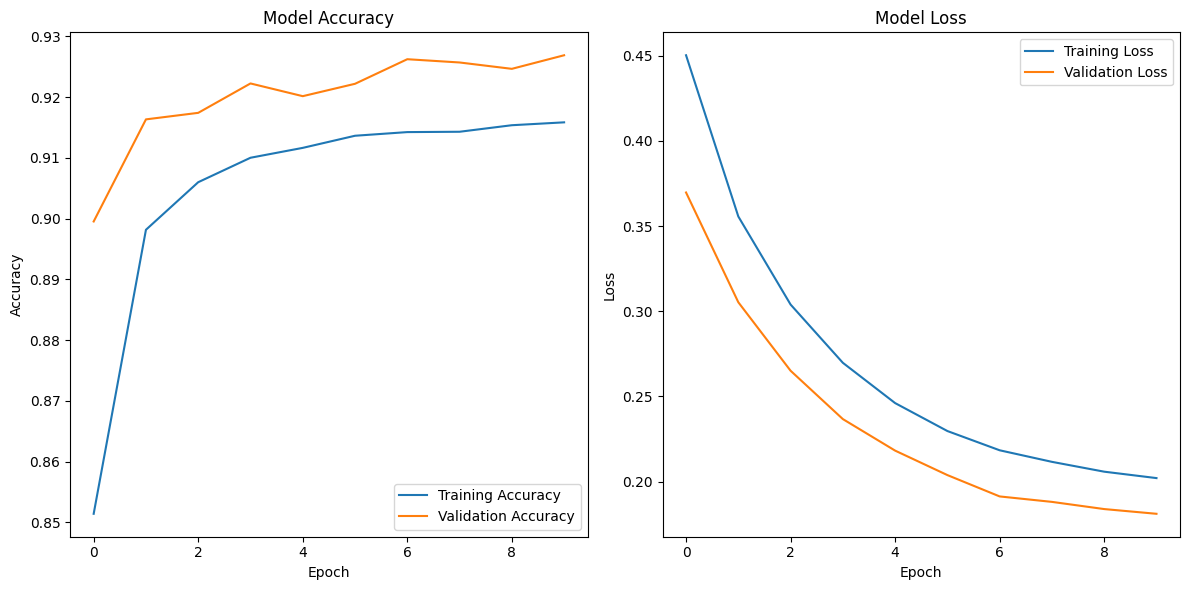

In [ ]:
import matplotlib.pyplot as plt

# Create a figure with subplots see
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot accuracy
axes[0].plot(history.history['accuracy'], label='Training Accuracy')
axes[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
axes[0].set_title('Model Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend()

# Plot loss
axes[1].plot(history.history['loss'], label='Training Loss')
axes[1].plot(history.history['val_loss'], label='Validation Loss')
axes[1].set_title('Model Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()

plt.tight_layout()
plt.show()


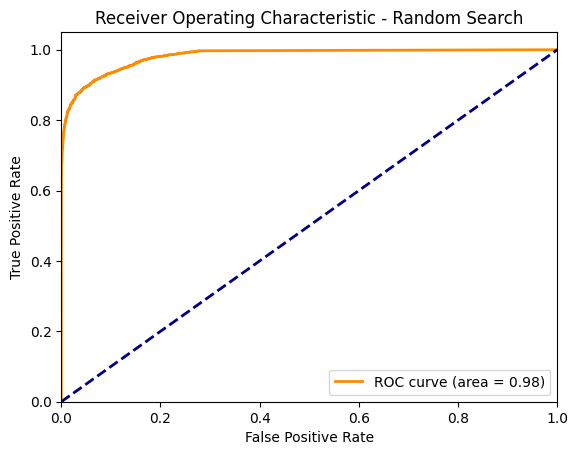

In [ ]:

from sklearn.metrics import roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt

# Calculate AUC-ROC
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot AUC-ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Random Search')
plt.legend(loc='lower right')
plt.show()

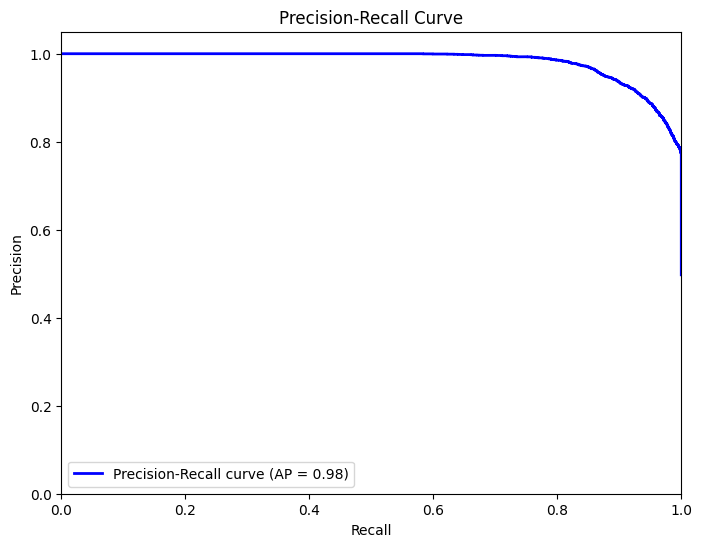

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt
# Calculate Precision-Recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_val)
average_precision = average_precision_score(y_test, y_pred_val)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve (AP = %0.2f)' % average_precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.show()

#metrics['Precision_RS'] = average_precision




## Deep Model Hyperparameters 25

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.regularizers import l1, l2  # Import l1 and l2 functions
from kerastuner import RandomSearch
from kerastuner import HyperParameters
import numpy as np
import time
import psutil
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, average_precision_score

modelname = "deep_ann_model"
hpt_method = "random search"

# Define a learning rate scheduler function
def lr_scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

# Update the model building function to include the new hyperparameters and configurations
def build_deep_ann_model(hp):
    model = Sequential()
    lu = hp['units']  # layer units
    # Input layer
    model.add(Dense(units=lu,
                    input_dim=len(features),
                    activation=hp['activation_layer1'],
                    kernel_initializer=hp['weight_initializer'],
                    kernel_regularizer=l1(hp['regularization_strength']) if hp['regularization_type'] == 'l1' else
                    l2(hp['regularization_strength']) if hp['regularization_type'] == 'l2' else None))

    # Hidden layers
    for i in range(1, 7):
        lu = lu / 2
        model.add(Dense(units=lu,
                        activation=hp[f'activation_layer{i + 1}'],
                        kernel_initializer=hp['weight_initializer'],
                        kernel_regularizer=l1(hp['regularization_strength']) if hp['regularization_type'] == 'l1' else
                        l2(hp['regularization_strength']) if hp['regularization_type'] == 'l2' else None))

        # Dropout layer (optional)
        if hp['use_dropout']:
            model.add(Dropout(rate=hp['dropout_rate']))

    # Output layer
    model.add(Dense(1, activation='sigmoid'))

    # Define the learning rate scheduler
    lr_schedule = LearningRateScheduler(lr_scheduler)

    # Choose the optimizer based on the hyperparameter value
    optimizer = None
    if hp['optimizer'] == 'adam':
        optimizer = tf.keras.optimizers.Adam(learning_rate=hp['learning_rate'])
    elif hp['optimizer'] == 'rmsprop':
        optimizer = tf.keras.optimizers.RMSprop(learning_rate=hp['learning_rate'])
    elif hp['optimizer'] == 'sgd':
        optimizer = tf.keras.optimizers.SGD(learning_rate=hp['learning_rate'], momentum=0.9)

    model.compile(optimizer=optimizer,
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model

# Create a HyperParameters object
hp = HyperParameters()
hp.Choice('units', [256])
# Add hyperparameters to the object
hp.Choice('activation_layer1', ['relu', 'tanh', 'leaky_relu'])
hp.Choice('activation_layer2', ['relu', 'tanh', 'leaky_relu'])
hp.Choice('activation_layer3', ['relu', 'tanh', 'leaky_relu'])
hp.Choice('activation_layer4', ['relu', 'tanh', 'leaky_relu'])
hp.Choice('activation_layer5', ['relu', 'tanh', 'leaky_relu'])
hp.Choice('activation_layer6', ['relu', 'tanh', 'leaky_relu'])
hp.Choice('activation_layer7', ['relu', 'tanh', 'leaky_relu'])
hp.Choice('optimizer', ['adam', 'rmsprop', 'sgd'])  # Hyperparameter for choosing the optimizer
hp.Choice('learning_rate', [0.01, 0.001, 0.0001])
hp.Choice('weight_initializer', ['random_normal', 'glorot_uniform', 'he_normal'])
hp.Choice('batch_size', [8, 16, 32, 64, 128, 256])
hp.Choice('regularization_type', ['','l1', 'l2'])
hp.Choice('regularization_strength', [0.0, 0.001, 0.01, 0.1])
hp.Choice('use_lr_scheduler', [True, False])  # Hyperparameter for choosing whether to use the learning rate scheduler
hp.Choice('use_dropout', [True, False])  # Hyperparameter for choosing whether to use dropout
hp.Float('dropout_rate', 0.0, 0.5, step=0.1)
  # Dropout rate hyperparameter dddd
# Instantiate the RandomSearch tuner with the HyperParameters object
tuner = RandomSearch(
    build_deep_ann_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=1,
    directory='my_dir',
    project_name='deep_ann_hyper_tuning_RS',
    hyperparameters=hp  # Use the HyperParameters object
)

# Record start time
start_time = time.time()

# Perform random search with early stopping
tuner.search(X_train, y_train, epochs=25, validation_data=(X_test, y_test), callbacks=[early_stopping])
# Record end time
end_time = time.time()
elapsed_time = end_time - start_time

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Build the model with the best hyperparameters and train it
best_model = tuner.hypermodel.build(best_hps)
history = best_model.fit(X_train, y_train, epochs=25, validation_split=0.2)

# Record additional metrics
memory_usage = psutil.virtual_memory().used
cpu_usage = psutil.cpu_percent()

# Evaluate the best model on the test set
print("Best Hyperparameters:")
print(best_hps.values)


# Evaluate the best model on the test set
test_metrics = best_model.evaluate(X_test, y_test)

# Additional classification metrics
y_pred = best_model.predict(X_test)
y_pred_classes = np.round(y_pred)

precision = precision_score(y_test, np.round(y_pred))
recall = recall_score(y_test, np.round(y_pred))
f1 = f1_score(y_test, np.round(y_pred))
roc_auc = roc_auc_score(y_test, y_pred)
avg_precision = average_precision_score(y_test, y_pred)

confusion_matrix = tf.math.confusion_matrix(y_test, y_pred_classes).numpy()

# Additional regression metrics
regression_metrics = {
    'mse': test_metrics[0],  # Mean Squared Error
    'mae': test_metrics[1],  # Mean Absolute Error
    'r_squared': 1 - (np.sum((y_test - y_pred.flatten())**2) / np.sum((y_test - np.mean(y_test))**2)),
    'explained_variance': 1 - (np.var(y_test - y_pred.flatten()) / np.var(y_test))
}

# Display metrics
print("Test Metrics:")
print(" - Loss:", test_metrics[0])
print(" - Accuracy:", test_metrics[1])
print(" - Other Metrics:")
print("   - Precision:", precision)
print("   - Recall:", recall)
print("   - F1 Score:", f1)
print("   - ROC-AUC:", roc_auc)
print("   - Precision Score", avg_precision)
print("   - Confusion Matrix:")
print(confusion_matrix)

print("Regression Metrics:")
for metric_name, metric_value in regression_metrics.items():
    print(f" - {metric_name}: {metric_value}")

# Save experiment details in hp_array
experiment_details = {
    'model': modelname,
    'hpt_method':hpt_method,
    'best_hyperparameters': best_hps.values,
    'elapsed_time': elapsed_time,
    'memory_usage': memory_usage,
    'cpu_usage': cpu_usage,
    'precision': precision,
    'recall': recall,
    'f1_score': f1,
    'roc_auc': roc_auc,
    'confusion_matrix': confusion_matrix.tolist(),
    'regression_metrics': regression_metrics
}
print(experiment_details)
hp_array.append(experiment_details)


Reloading Tuner from my_dir/deep_ann_hyper_tuning_RS/tuner0.json
Epoch 1/25
4418/4418 [==============================] - 32s 6ms/step - loss: 0.3212 - accuracy: 0.8547 - val_loss: 0.1942 - val_accuracy: 0.9057
Epoch 2/25
4418/4418 [==============================] - 16s 4ms/step - loss: 0.2281 - accuracy: 0.8945 - val_loss: 0.1818 - val_accuracy: 0.9053
Epoch 3/25
4418/4418 [==============================] - 16s 4ms/step - loss: 0.2008 - accuracy: 0.9019 - val_loss: 0.1696 - val_accuracy: 0.9174
Epoch 4/25
4418/4418 [==============================] - 16s 4ms/step - loss: 0.1885 - accuracy: 0.9083 - val_loss: 0.1668 - val_accuracy: 0.9211
Epoch 5/25
4418/4418 [==============================] - 16s 4ms/step - loss: 0.1840 - accuracy: 0.9110 - val_loss: 0.1632 - val_accuracy: 0.9207
Epoch 6/25
4418/4418 [==============================] - 16s 4ms/step - loss: 0.1796 - accuracy: 0.9138 - val_loss: 0.1579 - val_accuracy: 0.9257
Epoch 7/25
4418/4418 [==============================] - 16s 4ms/s

In [ ]:
import pandas as pd
metrics_f=ML_path  + 'mlj1_metrics_hpt7.csv'

# Convert hp_array to DataFrame
df = pd.DataFrame(hp_array)
print(df)
# Save DataFrame to CSV
df.to_csv(metrics_f, index=False)
print (metrics_f, "saved")

            model       hpt_method  \
0   shallow_model    random search   
1  deep_ann_model    random search   
2   shallow_model  random search25   
3  deep_ann_model    random search   
4  deep_ann_model    random search   

                                best_hyperparameters  elapsed_time  \
0  {'activation_layer1': 'tanh', 'optimizer': 'ad...   1396.311217   
1  {'units': 256, 'activation_layer1': 'tanh', 'a...   2147.244063   
2  {'activation_layer1': 'relu', 'optimizer': 'rm...   3476.335124   
3  {'units': 256, 'activation_layer1': 'tanh', 'a...      0.001815   
4  {'units': 256, 'activation_layer1': 'tanh', 'a...      0.011726   

   memory_usage  cpu_usage  precision    recall  f1_score   roc_auc  \
0    1843404800       68.9   0.902279  0.923925  0.912974  0.979352   
1    2540933120       75.1   0.949678  0.893235  0.920592  0.981939   
2    2586845184       69.4   0.939759  0.910309  0.924800  0.983390   
3    2579423232       31.5   0.951450  0.893668  0.921654  0.98389

##Create ANN Shallow model with Hyperparameters

In [ ]:
import tensorflow as tf
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, average_precision_score, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from keras.models import Sequential, load_model



# Define a function to build the shallow ANN model with given hyperparameters
def build_shallow_ann_model_with_hyperparams(hyperparameters):
    model = Sequential()

    # Input layer
    model.add(Dense(units=512,
                    input_dim=len(features),
                    activation=hyperparameters['activation_layer1'],
                    kernel_initializer=hyperparameters['weight_initializer'],
                    kernel_regularizer=tf.keras.regularizers.l1_l2(l1=hyperparameters['regularization_strength'],
                                                                  l2=hyperparameters['regularization_strength'])))

    # Dropout layer (optional)
    if hyperparameters['use_dropout']:
        model.add(Dropout(rate=hyperparameters['dropout_rate']))

    # Output layer
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model
    model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=hyperparameters['learning_rate']),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model

# Use the provided hyperparameters
best_hyperparameters = {
    'activation_layer1': 'relu',
    'optimizer': 'rmsprop',
    'learning_rate': 0.01,
    'weight_initializer': 'he_normal',
    'batch_size': 64,
    'regularization_type': '',  # No regularization
    'regularization_strength': 0,
    'use_lr_scheduler': False,
    'use_dropout': False,
    'dropout_rate': 0.4
}

start_time = time.time()
# Build the shallow ANN model with the provided hyperparameters
shallow_ann_model = build_shallow_ann_model_with_hyperparams(best_hyperparameters)

# Early stopping
early_stopping = EarlyStopping(patience=10, restore_best_weights=True)

# Train the model
history = shallow_ann_model.fit(X_train, y_train, epochs=100, batch_size=best_hyperparameters['batch_size'],
                                validation_split=0.2, callbacks=[early_stopping])
training_time = calculate_time(start_time)

start_time = time.time()
# Evaluate the model on the test set
test_metrics = shallow_ann_model.evaluate(X_test, y_test)

# Additional classification metrics
y_pred = shallow_ann_model.predict(X_test)
testing_time = calculate_time(start_time)

y_pred_classes = np.round(y_pred)

precision = precision_score(y_test, y_pred_classes)
recall = recall_score(y_test, y_pred_classes)
f1 = f1_score(y_test, y_pred_classes)
roc_auc = roc_auc_score(y_test, y_pred)
avg_precision = average_precision_score(y_test, y_pred)

conf_matrix = confusion_matrix(y_test, y_pred_classes)

print(metrics_results)
metrics=[]
metrics_dict={}

test_metrics = shallow_ann_model.evaluate(X_test, y_test)
metrics_dict['data'] = 'ANN Shallow Model'
metrics_dict['training_time'] = training_time
metrics_dict['testing_time'] = testing_time

metrics_dict['loss'] = test_metrics[0]
metrics_dict['accuracy'] = test_metrics[1]

# Add classification metrics to the dictionary
metrics_dict['precision'] = precision
metrics_dict['recall'] = recall
metrics_dict['f1_score'] = f1
metrics_dict['roc_auc'] = roc_auc
metrics_dict['avg_precision'] = avg_precision
metrics_dict['confusion_matrix'] = conf_matrix

# Display metrics
print("Test Metrics:")
print(" - Loss:", test_metrics[0])
print(" - Accuracy:", test_metrics[1])
print(" - Other Metrics:")
print("   - Precision:", precision)
print("   - Recall:", recall)
print("   - F1 Score:", f1)
print("   - ROC-AUC:", roc_auc)
print("   - Precision Score", avg_precision)
print("   - Confusion Matrix:")
print(conf_matrix)



Epoch 1/100
2209/2209 [==============================] - 10s 4ms/step - loss: 0.2088 - accuracy: 0.9038 - val_loss: 0.2048 - val_accuracy: 0.8970
Epoch 2/100
2209/2209 [==============================] - 5s 2ms/step - loss: 0.1814 - accuracy: 0.9176 - val_loss: 0.1760 - val_accuracy: 0.9216
Epoch 3/100
2209/2209 [==============================] - 6s 3ms/step - loss: 0.1750 - accuracy: 0.9211 - val_loss: 0.1758 - val_accuracy: 0.9214
Epoch 4/100
2209/2209 [==============================] - 5s 2ms/step - loss: 0.1724 - accuracy: 0.9220 - val_loss: 0.1751 - val_accuracy: 0.9221
Epoch 5/100
2209/2209 [==============================] - 7s 3ms/step - loss: 0.1710 - accuracy: 0.9241 - val_loss: 0.1681 - val_accuracy: 0.9259
Epoch 6/100
2209/2209 [==============================] - 11s 5ms/step - loss: 0.1683 - accuracy: 0.9248 - val_loss: 0.1669 - val_accuracy: 0.9279
Epoch 7/100
2209/2209 [==============================] - 13s 6ms/step - loss: 0.1682 - accuracy: 0.9260 - val_loss: 0.1641 - val

In [ ]:
# Save the model
metrics.append(metrics_dict)

shallow_ann_model.save(shallow_model_path)

print(shallow_model_path, "saved")

shallow_ann_model.summary()
metrics

/content/drive/MyDrive/ANN_Edge/unsw_data/final/shallow_model_ANN5.keras saved
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 512)               10752     
                                                                 
 dense_29 (Dense)            (None, 1)                 513       
                                                                 
Total params: 11265 (44.00 KB)
Trainable params: 11265 (44.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


[{'data': 'ANN Shallow Model',
  'training_time': 131.80130243301392,
  'testing_time': 1.2068166732788086,
  'loss': 0.16980111598968506,
  'accuracy': 0.9234408736228943,
  'precision': 0.937625754527163,
  'recall': 0.9064188459044737,
  'f1_score': 0.9217582417582418,
  'roc_auc': 0.9827373508178324,
  'avg_precision': 0.983372397179392,
  'confusion_matrix': array([[4394,  279],
         [ 433, 4194]])}]

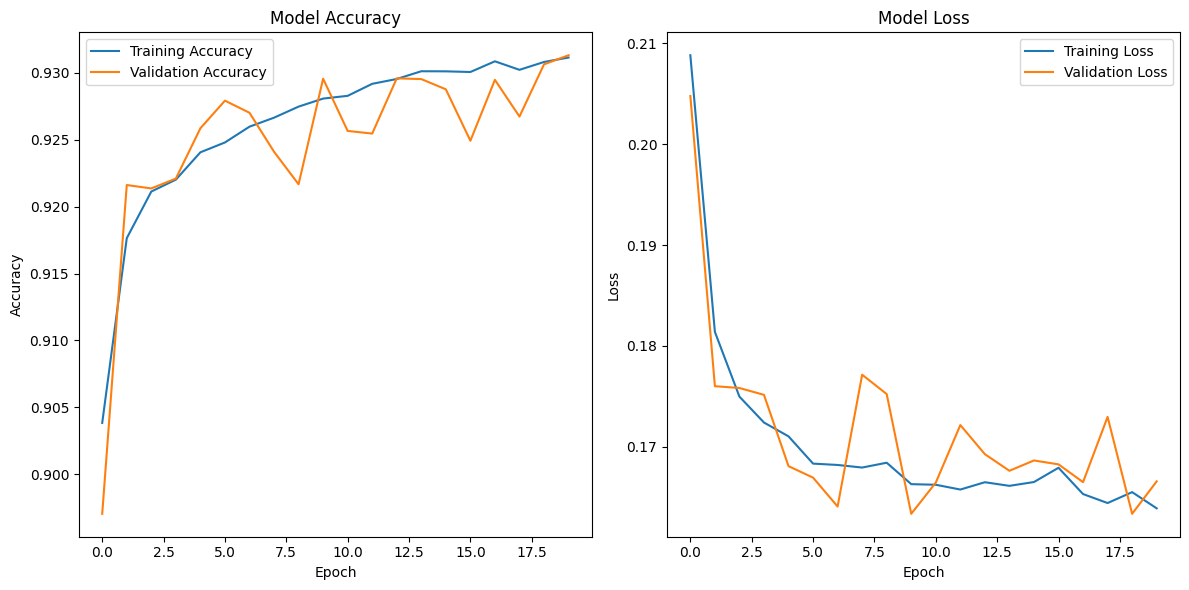

In [ ]:
import matplotlib.pyplot as plt

# Create a figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot accuracy
axes[0].plot(history.history['accuracy'], label='Training Accuracy')
axes[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
axes[0].set_title('Model Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend()

# Plot loss
axes[1].plot(history.history['loss'], label='Training Loss')
axes[1].plot(history.history['val_loss'], label='Validation Loss')
axes[1].set_title('Model Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()

plt.tight_layout()
plt.show()


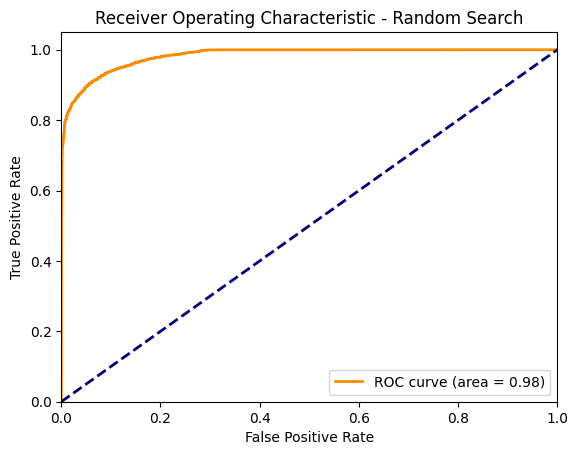

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt

# Calculate AUC-ROC
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot AUC-ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Random Search')
plt.legend(loc='lower right')
plt.show()

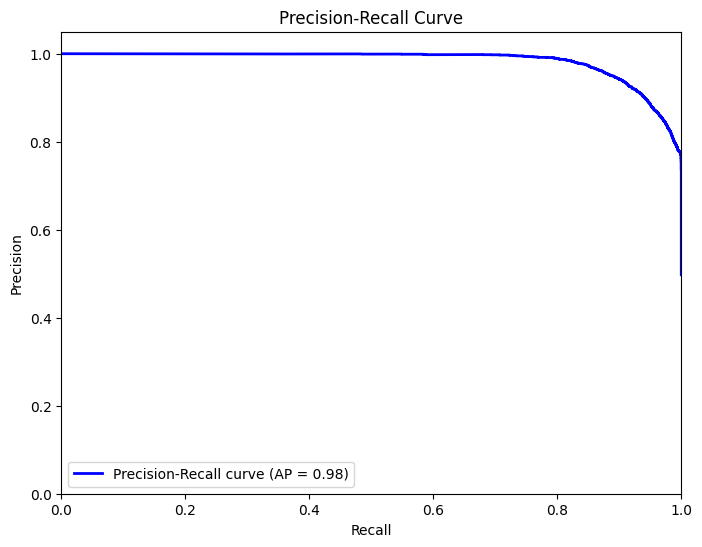

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Calculate Precision-Recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
average_precision = average_precision_score(y_test, y_pred)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve (AP = %0.2f)' % average_precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.show()

#metrics['Precision_RS'] = average_precision




#Build Deep Learning Model  with Hyperparameters

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l1, l2
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, average_precision_score, confusion_matrix

from keras.models import Sequential, load_model

# Define the function to build the model with the provided hyperparameters
def build_deep_ann_model_with_hyperparams(hyperparameters):
    model = Sequential()
    units = hyperparameters['units']  # layer units
    # Input layer
    model.add(Dense(units=units,
                    input_dim=hyperparameters ['num_features'],
                    activation=hyperparameters['activation_layer1'],
                    kernel_initializer=hyperparameters['weight_initializer'],
                    kernel_regularizer=l1(hyperparameters['regularization_strength']) if hyperparameters['regularization_type'] == 'l1' else
                    l2(hyperparameters['regularization_strength']) if hyperparameters['regularization_type'] == 'l2' else None))

    # Hidden layers
    lu=units
    for i in range(1, 7):
        print("layer ", i+1 , "\n")
        lu=lu/2
        model.add(Dense(units=lu,
                        activation=hyperparameters[f'activation_layer{i + 1}'],
                        kernel_initializer=hyperparameters['weight_initializer'],
                        kernel_regularizer=l1(hyperparameters['regularization_strength']) if hyperparameters['regularization_type'] == 'l1' else
                        l2(hyperparameters['regularization_strength']) if hyperparameters['regularization_type'] == 'l2' else None))

        # Dropout layer (optional)
        if hyperparameters['use_dropout']:
            model.add(Dropout(rate=hyperparameters['dropout_rate']))

    # Output layer
    model.add(Dense(1, activation='sigmoid'))

    # Define the learning rate scheduler
    lr_schedule = LearningRateScheduler(lr_scheduler) if hyperparameters['use_lr_scheduler'] else None

    # Choose the optimizer based on the hyperparameter value
    optimizer = None
    if hyperparameters['optimizer'] == 'adam':
        optimizer = tf.keras.optimizers.Adam(learning_rate=hyperparameters['learning_rate'])
    elif hyperparameters['optimizer'] == 'rmsprop':
        optimizer = tf.keras.optimizers.RMSprop(learning_rate=hyperparameters['learning_rate'])
    elif hyperparameters['optimizer'] == 'sgd':
        optimizer = tf.keras.optimizers.SGD(learning_rate=hyperparameters['learning_rate'], momentum=0.9)

    model.compile(optimizer=optimizer,
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model

hyperparameters = {
    'units': 256,
    'num_features': len(features),
    'activation_layer1': 'tanh',
    'activation_layer2': 'relu',
    'activation_layer3': 'relu',
    'activation_layer4': 'tanh',
    'activation_layer5': 'leaky_relu',
    'activation_layer6': 'leaky_relu',
    'activation_layer7': 'relu',
    'optimizer': 'adam',
    'learning_rate': 0.0001,
    'weight_initializer': 'glorot_uniform',
    'batch_size': 64,
    'regularization_type': '',
    'regularization_strength': 0.01,
    'use_lr_scheduler': False,
    'use_dropout': True,
    'dropout_rate': 0.1
}

start_time = time.time()
# Build the deep ANN model with the provided hyperparameters
deep_ann_model = build_deep_ann_model_with_hyperparams(hyperparameters)

# Early stopping
early_stopping = EarlyStopping(patience=10, restore_best_weights=True)

# Train the model
history = deep_ann_model.fit(X_train, y_train, epochs=100, batch_size=hyperparameters['batch_size'],
                                validation_split=0.2, callbacks=[early_stopping])
training_time = calculate_time(start_time)
# Save the model


start_time = time.time()
# Evaluate the model on the test set
test_metrics = deep_ann_model.evaluate(X_test, y_test)
# Additional classification metrics
y_pred = deep_ann_model.predict(X_test)
testing_time = calculate_time(start_time)

deep_ann_model.save(deep_model_path)

print(deep_model_path, "saved")

deep_ann_model.summary()


layer  2 

layer  3 

layer  4 

layer  5 

layer  6 

layer  7 

Epoch 1/100
2209/2209 [==============================] - 17s 6ms/step - loss: 0.3433 - accuracy: 0.8426 - val_loss: 0.2076 - val_accuracy: 0.8937
Epoch 2/100
2209/2209 [==============================] - 11s 5ms/step - loss: 0.2187 - accuracy: 0.8954 - val_loss: 0.1808 - val_accuracy: 0.9117
Epoch 3/100
2209/2209 [==============================] - 11s 5ms/step - loss: 0.1939 - accuracy: 0.9054 - val_loss: 0.1704 - val_accuracy: 0.9155
Epoch 4/100
2209/2209 [==============================] - 10s 5ms/step - loss: 0.1842 - accuracy: 0.9100 - val_loss: 0.1674 - val_accuracy: 0.9192
Epoch 5/100
2209/2209 [==============================] - 9s 4ms/step - loss: 0.1792 - accuracy: 0.9140 - val_loss: 0.1641 - val_accuracy: 0.9225
Epoch 6/100
2209/2209 [==============================] - 11s 5ms/step - loss: 0.1753 - accuracy: 0.9166 - val_loss: 0.1615 - val_accuracy: 0.9241
Epoch 7/100
2209/2209 [==============================] - 10

In [ ]:
y_pred_classes = np.round(y_pred)
precision = precision_score(y_test, y_pred_classes)
recall = recall_score(y_test, y_pred_classes)
f1 = f1_score(y_test, y_pred_classes)
roc_auc = roc_auc_score(y_test, y_pred)
avg_precision = average_precision_score(y_test, y_pred)

conf_matrix = confusion_matrix(y_test, y_pred_classes)

metrics_dict={}
test_metrics = deep_ann_model.evaluate(X_test, y_test)

metrics_dict['data'] ="ANN Deep Model"
metrics_dict['training_time'] = training_time
metrics_dict['testing_time'] = testing_time
metrics_dict['loss'] = test_metrics[0]
metrics_dict['accuracy'] = test_metrics[1]

# Add classification metrics to the dictionary
metrics_dict['precision'] = precision
metrics_dict['recall'] = recall
metrics_dict['f1_score'] = f1
metrics_dict['roc_auc'] = roc_auc
metrics_dict['avg_precision'] = avg_precision
metrics_dict['confusion_matrix'] = conf_matrix

# Display metrics
print("Test Metrics:")
print(" - Loss:", test_metrics[0])
print(" - Accuracy:", test_metrics[1])
print(" - Other Metrics:")
print("   - Precision:", precision)
print("   - Recall:", recall)
print("   - F1 Score:", f1)
print("   - ROC-AUC:", roc_auc)
print("   - Precision Score", avg_precision)
print("   - Confusion Matrix:")
print(conf_matrix)

metrics.append(metrics_dict)

291/291 [==============================] - 0s 2ms/step - loss: 0.1433 - accuracy: 0.9313
Test Metrics:
 - Loss: 0.14331798255443573
 - Accuracy: 0.931290328502655
 - Other Metrics:
   - Precision: 0.9484930274403959
   - Recall: 0.9113896693321807
   - F1 Score: 0.929571255373085
   - ROC-AUC: 0.9865495610922798
   - Precision Score 0.9872719460373728
   - Confusion Matrix:
[[4444  229]
 [ 410 4217]]


In [ ]:
# Convert performance_data to a pandas DataFrame
df = pd.DataFrame(metrics)
# Save the DataFrame to a CSV file
df.to_csv(metrics_results, index=False)
print(metrics_results, "saved")

/content/drive/MyDrive/ANN_Edge/unsw_data/final/ml/mlj1_metrics_models.csv saved


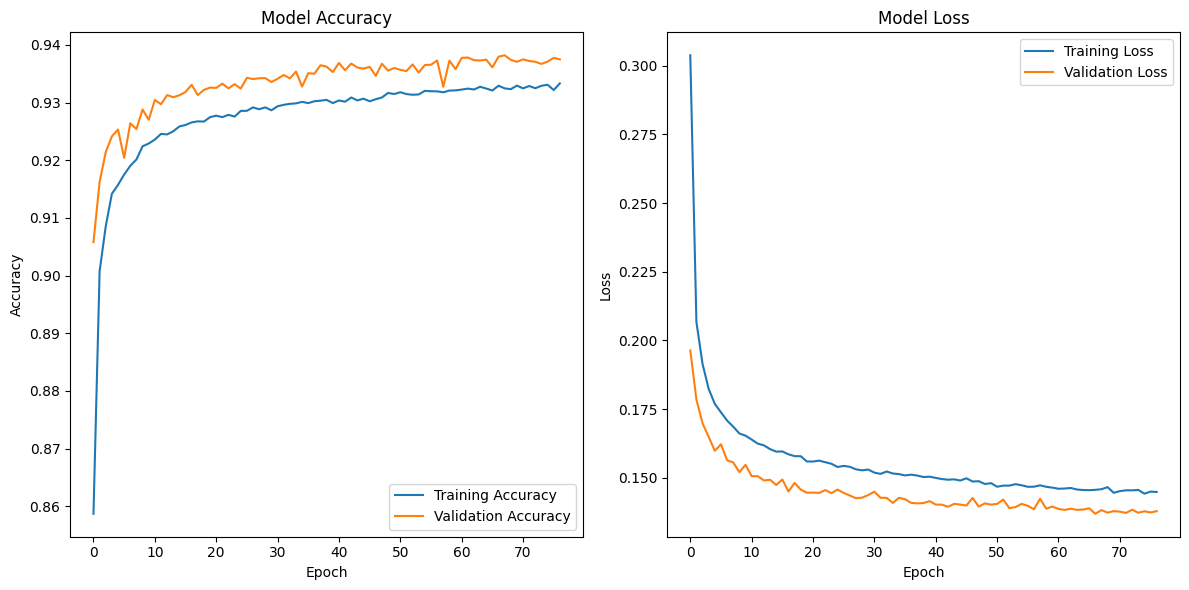

In [ ]:
import matplotlib.pyplot as plt

# Create a figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot accuracy
axes[0].plot(history.history['accuracy'], label='Training Accuracy')
axes[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
axes[0].set_title('Model Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend()

# Plot loss
axes[1].plot(history.history['loss'], label='Training Loss')
axes[1].plot(history.history['val_loss'], label='Validation Loss')
axes[1].set_title('Model Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()

plt.tight_layout()
plt.show()


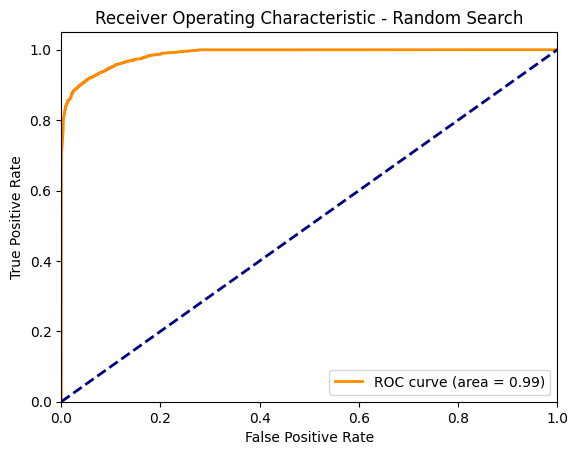

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt

# Calculate AUC-ROC
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot AUC-ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Random Search')
plt.legend(loc='lower right')
plt.show()

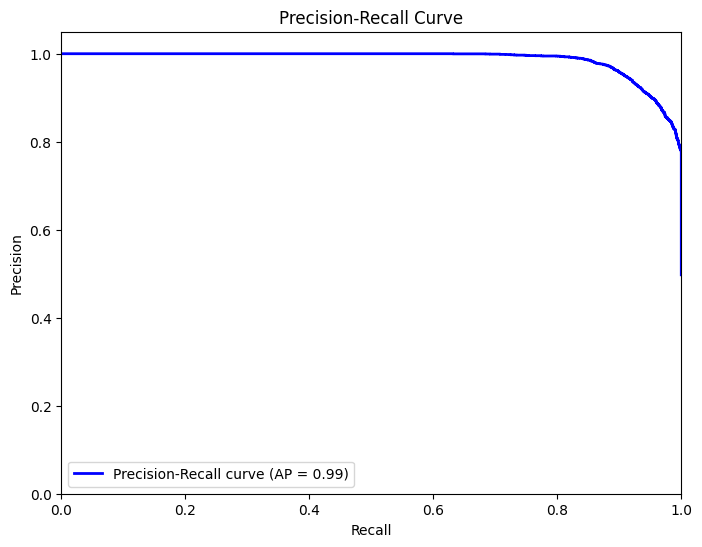

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Calculate Precision-Recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
average_precision = average_precision_score(y_test, y_pred)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve (AP = %0.2f)' % average_precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.show()

#metrics['Precision_RS'] = average_precision




In [ ]:
import datetime

# Get the current datetime
current_datetime = datetime.datetime.now()

# Add a time delta (5 hours and 30 minutes)
time_delta = datetime.timedelta(hours=5, minutes=30)
updated_datetime = current_datetime + time_delta

# Format the updated datetime
formatted_datetime = updated_datetime.strftime("%Y-%m-%d %H:%M:%S")
print("Updated Datetime:", formatted_datetime)

Updated Datetime: 2024-02-27 17:26:36
